In [1]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path =r"C:\Users\NT550-052\OneDrive\바탕 화면\ASAC\프로젝트\ML\web_crawling\CGW\finaldata\finaldata_gw.csv"
data = pd.read_csv(path,sep="\t")
data

,appid,24_Hour_Peak,All_time_peak,positive,negative,average_forever,average_2weeks,median_forever,median_2weeks,price,...,metacritic_tf,windows,mac,linux,platforms_num,recommendations,achievements,new_date,days_after_release,Review
0,294100,20930,60742,157344,3038,12492,1401,5368,921,34.99,...,1,1.0,1.0,1.0,3.0,134967.0,0.0,2018-10-17,1675,Overwhelmingly Positive
1,960090,13428,53891,246979,6441,4018,277,1532,62,13.99,...,0,1.0,1.0,0.0,2.0,222889.0,146.0,2018-12-18,1613,Overwhelmingly Positive
2,504230,1234,4148,71428,1686,1316,310,370,582,19.99,...,1,1.0,1.0,1.0,3.0,66397.0,32.0,2018-01-25,1940,Overwhelmingly Positive
3,588650,4553,14880,128085,3722,1841,183,868,213,14.99,...,1,1.0,1.0,1.0,3.0,113184.0,121.0,2018-08-06,1747,Overwhelmingly Positive
4,264710,4205,50876,221972,7800,1943,313,941,277,29.99,...,1,1.0,1.0,0.0,2.0,208334.0,17.0,2018-01-24,1941,Overwhelmingly Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46247,1995280,0,0,0,0,0,0,0,0,14.99,...,0,1.0,0.0,0.0,1.0,0.0,0.0,2022-12-02,168,Negative
46248,2098860,0,0,0,11,0,0,0,0,9.99,...,0,1.0,0.0,0.0,1.0,0.0,0.0,2022-08-09,283,Negative
46249,2154770,814,1176,0,0,0,0,0,0,0.00,...,0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-01,169,Very Negative
46250,1915410,0,1,0,16,0,0,0,0,2.99,...,0,1.0,0.0,0.0,1.0,0.0,0.0,2022-04-26,388,Negative


In [3]:
data.drop(columns=["metacritic","recommendations","positive","negative","new_date"],inplace=True)

In [4]:
data["Review"] = data["Review"].apply(lambda x : 'Positive' if 'Positive' in x else x).apply(lambda x : 'Negative' if 'Negative' in x else x).apply(lambda x : 'Indifference' if 'user' in x else x)

In [5]:
data

,appid,24_Hour_Peak,All_time_peak,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,genre,...,controller_support,dlc,metacritic_tf,windows,mac,linux,platforms_num,achievements,days_after_release,Review
0,294100,20930,60742,12492,1401,5368,921,34.99,34.99,"Indie, Simulation, Strategy",...,0,6.0,1,1.0,1.0,1.0,3.0,0.0,1675,Positive
1,960090,13428,53891,4018,277,1532,62,13.99,13.99,Strategy,...,0,1.0,0,1.0,1.0,0.0,2.0,146.0,1613,Positive
2,504230,1234,4148,1316,310,370,582,19.99,19.99,"Action, Adventure, Indie",...,1,1.0,1,1.0,1.0,1.0,3.0,32.0,1940,Positive
3,588650,4553,14880,1841,183,868,213,14.99,24.99,"Action, Adventure, Indie",...,1,7.0,1,1.0,1.0,1.0,3.0,121.0,1747,Positive
4,264710,4205,50876,1943,313,941,277,29.99,29.99,"Adventure, Indie",...,1,1.0,1,1.0,1.0,0.0,2.0,17.0,1941,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46247,1995280,0,0,0,0,0,0,14.99,14.99,"Adventure, Indie",...,0,1.0,0,1.0,0.0,0.0,1.0,0.0,168,Negative
46248,2098860,0,0,0,0,0,0,9.99,9.99,"Adventure, Casual",...,0,0.0,0,1.0,0.0,0.0,1.0,0.0,283,Negative
46249,2154770,814,1176,0,0,0,0,0.00,0.00,N,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,169,Negative
46250,1915410,0,1,0,0,0,0,2.99,2.99,"Action, Indie",...,0,0.0,0,1.0,0.0,0.0,1.0,0.0,388,Negative


In [6]:

# 장르 처리 (클러스터링)

from sklearn.cluster import KMeans
from gensim.models import FastText
import nltk
nltk.download()

genr = data["genre"]
gs = genr.values
gs = gs.tolist()
gs = list(set(gs))

for i in range(len(gs)):
    gs[i] = gs[i].split(",")
    for j in range(len(gs[i])):
        if " " in gs[i][j]:
            gs[i][j]=gs[i][j].replace(" ","")
    gs[i] = ",".join(gs[i])

print(gs)
normalized_text = []
for string in gs:
    tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
    normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
genr = [word_tokenize(sentence) for sentence in normalized_text]

model = FastText(genr,min_count=1,workers=4, sg=1)
model.build_vocab(corpus_iterable=genr)
model.train(corpus_iterable=genr, total_examples=len(genr), epochs=10)

word_vectors = model.wv.vectors # 어휘의 feature vector
print(word_vectors.shape)

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
['Adventure,FreetoPlay,Racing', 'Action,Casual,FreetoPlay,Indie,MassivelyMultiplayer,Simulation,Sports,Strategy', 'RPG,Simulation,Strategy,EarlyAccess', 'Casual,Indie,RPG,Simulation,Strategy,EarlyAccess', 'Action,Adventure,FreetoPlay,Indie,RPG,EarlyAccess', 'Action,Adventure,Indie,RPG,Sports', 'Action,Casual,FreetoPlay,Indie,Racing,Sports,EarlyAccess', 'Casual,FreetoPlay,RPG,Strategy', 'Action,Indie,Simulation,Sports,Strategy,EarlyAccess', 'FreetoPlay,MassivelyMultiplayer,RPG,Strategy,EarlyAccess', 'Action,Casual', 'Adventure,FreetoPlay,Indie,Simulation', 'Action,Casual,Indie,Simulation,Strategy,EarlyAccess', 'Casual,FreetoPlay,MassivelyMultiplayer,RPG,EarlyAccess', 'Indie,Simulation,Education,EarlyAccess', 'Casual,Indie,Racing,Strategy', 'Violent,Adventure,Indie,RPG,Strategy', 'Violent,Gore,Action,Adventure,Indie,Simulation,EarlyAccess', 'Violent,Adventure,Casual,Indie,Strategy,EarlyAccess', 'Action,Freet

c:\Users\NT550-052\anaconda3\envs\mlp\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\NT550-052\anaconda3\envs\mlp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\NT550-052\anaconda3\envs\mlp\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\NT550-052\anaconda3\envs\mlp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

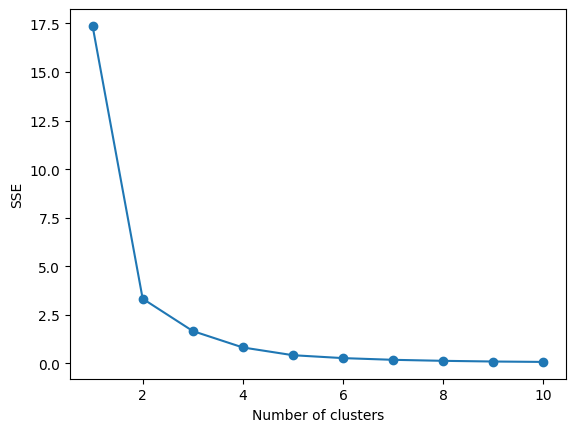

In [7]:
# 엘보우
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    idx = kmeans.fit_predict(word_vectors)
    sse.append(kmeans.inertia_)

# num_clusters = int(word_vectors.shape[0]/4) # 어휘 크기의 1/5나 평균 5단어
# num_clusters = int(num_clusters)
# print(num_clusters)

# kmeans_clustering = KMeans(n_clusters=num_clusters)
# idx = kmeans_clustering.fit_predict(word_vectors)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

c:\Users\NT550-052\anaconda3\envs\mlp\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\NT550-052\anaconda3\envs\mlp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\NT550-052\anaconda3\envs\mlp\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\NT550-052\anaconda3\envs\mlp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

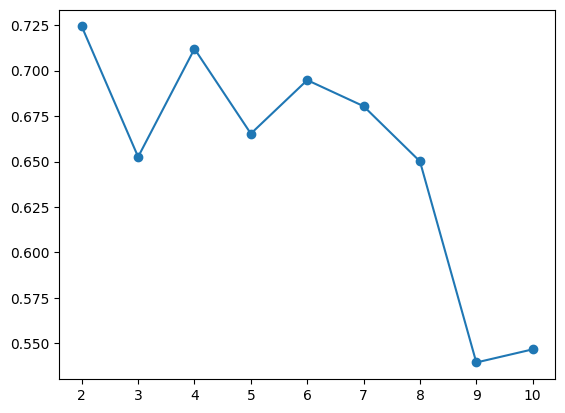

In [8]:
# 실루엣
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    idx = kmeans.fit_predict(word_vectors)
    score = silhouette_score(word_vectors, kmeans.labels_)
    silhouette_scores.append(score)
plt.plot(range(2, 11), silhouette_scores, marker='o')

In [9]:
num_clusters = 6
kmeans = KMeans(n_clusters=6, random_state=0)
idx = kmeans.fit_predict(word_vectors)

idx = list(idx)
names = model.wv.index_to_key
word_centroid_map = {names[i]: idx[i] for i in range(len(names))}

c:\Users\NT550-052\anaconda3\envs\mlp\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\NT550-052\anaconda3\envs\mlp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
clt = {}
for c in range(num_clusters):
    # 클러스터 번호를 출력
    # print("\ncluster {}".format(c))
    
    words = []
    cluster_values = list(word_centroid_map.values())
    for i in range(len(cluster_values)):
        if (cluster_values[i] == c):
            words.append(list(word_centroid_map.keys())[i])    
    clt["cluster"+str(c)] = words     

In [11]:
clt

{'cluster0': ['indie',
  'action',
  'casual',
  'simulation',
  'adventure',
  'strategy',
  'earlyaccess',
  'rpg',
  'freetoplay',
  'massivelymultiplayer',
  'sports',
  'racing',
  '360v'],
 'cluster1': ['utilities',
  'animation',
  'audioproduction',
  'webpublishing',
  'videoproduction',
  'photoediting'],
 'cluster2': ['violent',
  'gore',
  'nudity',
  'sexualcontent',
  'tutorial',
  'movie',
  'documentary',
  'episodic',
  'short'],
 'cluster3': ['actiongames', 'n'],
 'cluster4': ['education',
  'illustration',
  'design',
  'modeling',
  'softwaretraining'],
 'cluster5': ['gamedevelopment', 'accounting']}

In [12]:
genr = data["genre"]
gs = genr.values
gs = gs.tolist()

for i in range(len(gs)):
    gs[i] = gs[i].split(",")
    for j in range(len(gs[i])):
        if " " in gs[i][j]:
            gs[i][j]=gs[i][j].replace(" ","")
    gs[i] = ",".join(gs[i])


normalized_text = []
for string in gs:
    tokens = re.sub(r"[^a-z0-9 ]+", " ", string.lower())
    normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
genr = [word_tokenize(sentence) for sentence in normalized_text]
genr

[['indie', 'simulation', 'strategy'],
 ['strategy'],
 ['action', 'adventure', 'indie'],
 ['action', 'adventure', 'indie'],
 ['adventure', 'indie'],
 ['action', 'indie'],
 ['action', 'indie'],
 ['adventure', 'indie'],
 ['adventure', 'rpg', 'strategy'],
 ['action', 'adventure', 'indie', 'rpg', 'simulation', 'earlyaccess'],
 ['casual', 'indie'],
 ['adventure', 'indie', 'rpg'],
 ['action', 'adventure', 'indie', 'simulation'],
 ['adventure', 'indie'],
 ['adventure', 'freetoplay', 'indie'],
 ['adventure', 'casual', 'indie', 'rpg'],
 ['action', 'freetoplay', 'indie'],
 ['action', 'adventure', 'rpg'],
 ['casual', 'indie'],
 ['adventure', 'casual', 'simulation'],
 ['action', 'indie', 'rpg', 'simulation', 'strategy'],
 ['adventure', 'indie'],
 ['casual', 'indie'],
 ['action', 'indie', 'sports'],
 ['casual'],
 ['indie', 'rpg'],
 ['casual', 'freetoplay', 'indie'],
 ['adventure'],
 ['adventure'],
 ['action', 'indie'],
 ['adventure'],
 ['action',
  'adventure',
  'casual',
  'freetoplay',
  'indie',

In [13]:
len(data) == len(genr)

True

In [14]:
cont = []
for i in range(len(data)):
    # genr = set(data.loc[i,"genre"].split(", "))
    tmp = []
    for k,v in clt.items():
        tmp.append(len(set(v).intersection(set(genr[i]))))
    cont.append(tmp)


In [15]:
cont

[[3, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 0, 0],
 [6, 0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 0, 0],
 [4, 0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 0, 0],
 [4, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 0, 0],
 [5, 0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [7, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 0, 0],
 [5, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 0, 0],
 [4, 0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0],
 [2, 0, 0, 0, 0, 0],
 [4, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [4, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 0, 0],
 [3, 0, 0, 0,

In [16]:
# tmp = pd.DataFrame(data = cont, columns=["c0","c1","c2","c3","c4","c5","c6","c7","c8"])
tmp = pd.DataFrame(data = cont, columns=["c0","c1","c2","c3","c4","c5"])
# tmp = pd.DataFrame(data = cont, columns=["c0","c1"])

In [17]:
data = pd.concat([data,tmp],axis=1)

In [18]:
data

,appid,24_Hour_Peak,All_time_peak,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,genre,...,platforms_num,achievements,days_after_release,Review,c0,c1,c2,c3,c4,c5
0,294100,20930,60742,12492,1401,5368,921,34.99,34.99,"Indie, Simulation, Strategy",...,3.0,0.0,1675,Positive,3,0,0,0,0,0
1,960090,13428,53891,4018,277,1532,62,13.99,13.99,Strategy,...,2.0,146.0,1613,Positive,1,0,0,0,0,0
2,504230,1234,4148,1316,310,370,582,19.99,19.99,"Action, Adventure, Indie",...,3.0,32.0,1940,Positive,3,0,0,0,0,0
3,588650,4553,14880,1841,183,868,213,14.99,24.99,"Action, Adventure, Indie",...,3.0,121.0,1747,Positive,3,0,0,0,0,0
4,264710,4205,50876,1943,313,941,277,29.99,29.99,"Adventure, Indie",...,2.0,17.0,1941,Positive,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46247,1995280,0,0,0,0,0,0,14.99,14.99,"Adventure, Indie",...,1.0,0.0,168,Negative,2,0,0,0,0,0
46248,2098860,0,0,0,0,0,0,9.99,9.99,"Adventure, Casual",...,1.0,0.0,283,Negative,2,0,0,0,0,0
46249,2154770,814,1176,0,0,0,0,0.00,0.00,N,...,0.0,0.0,169,Negative,0,0,0,1,0,0
46250,1915410,0,1,0,0,0,0,2.99,2.99,"Action, Indie",...,1.0,0.0,388,Negative,2,0,0,0,0,0


In [19]:
tag_path = r"C:\Users\NT550-052\OneDrive\바탕 화면\ASAC\프로젝트\ML\web_crawling\merge_dataset\tag_merge.csv"
tag_df = pd.read_csv(tag_path)
data = pd.merge(data,tag_df,how="inner",left_on="appid",right_on="appid")

In [20]:
data.drop(columns=["genre","appid"],inplace=True)

In [21]:
data

,24_Hour_Peak,All_time_peak,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,num_lang,required_age,...,360 Video,Linear,Grid-Based Movement,FMV,Lemmings,Tile-Matching,Indie,Arcade,Atmospheric,Cats
0,20930,60742,12492,1401,5368,921,34.99,34.99,35,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1223.0,0.0,0.0,0.0
1,13428,53891,4018,277,1532,62,13.99,13.99,24,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,161.0,0.0,0.0,0.0
2,1234,4148,1316,310,370,582,19.99,19.99,14,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,887.0,0.0,320.0,0.0
3,4553,14880,1841,183,868,213,14.99,24.99,21,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1003.0,0.0,3360.0,0.0
4,4205,50876,1943,313,941,277,29.99,29.99,38,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1420.0,0.0,2618.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46247,0,0,0,0,0,0,14.99,14.99,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46248,0,0,0,0,0,0,9.99,9.99,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322.0,0.0
46249,814,1176,0,0,0,0,0.00,0.00,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46250,0,1,0,0,0,0,2.99,2.99,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0


In [22]:
data.to_csv(r"C:\Users\NT550-052\OneDrive\바탕 화면\ASAC\프로젝트\ML\web_crawling\CGW\modeling\byall\genre_clt.csv",sep=";")

In [23]:
X = data.drop(columns="Review")
y = data["Review"]

In [24]:
y.value_counts()

Review
Positive        19419
Indifference    19096
Mixed            6575
Negative         1162
Name: count, dtype: int64

In [25]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=0,sampling_strategy='all').fit_resample(X, y)

In [26]:
y.value_counts(normalize=True)

Review
Positive        0.419852
Indifference    0.412869
Mixed           0.142156
Negative        0.025123
Name: proportion, dtype: float64

In [27]:
y_resampled.value_counts(normalize=True)

Review
Positive        0.25
Mixed           0.25
Indifference    0.25
Negative        0.25
Name: proportion, dtype: float64

In [28]:
X,y = X_resampled,y_resampled

In [29]:
from sklearn.model_selection import train_test_split 



X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 1234, # 옵션, 재현성을 위함 
    stratify = y # 옵션 : 비율 나눌 때 비율 유지할지 말지 
)

In [30]:
y_train.value_counts(normalize=True)

Review
Indifference    0.25
Negative        0.25
Mixed           0.25
Positive        0.25
Name: proportion, dtype: float64

In [31]:
y_val.value_counts(normalize=True)

Review
Mixed           0.25
Negative        0.25
Indifference    0.25
Positive        0.25
Name: proportion, dtype: float64

In [32]:
# str-kfold
from sklearn.model_selection import StratifiedKFold

str_kfold = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,recall_score,f1_score

In [34]:
# lightgbm base model
from lightgbm import LGBMClassifier
from sklearn.metrics import make_scorer

# scorers = {
#             'f1_score': make_scorer(f1_score, average='micro'),
#             'recall_score': make_scorer(recall_score, average='micro'),
#             'accuracy_score': make_scorer(accuracy_score)
#           }

lgbm = LGBMClassifier(random_state=1234,n_jobs=-1)
scores = cross_val_score( lgbm, 
                         X_train, y_train,
                         cv = str_kfold, # --> 고정적으로 CV할 때 데이터셋 고정..
                         scoring = "accuracy")
for iter_count, acc in enumerate( scores):
    print("lgbm {0}번째 검증 ACC:{1:.4f}".format(iter_count+1,acc ))
print("lgbm 모델 Accuracy 평균:", scores.mean())
print("lgbm 모델 Accuracy std:", scores.std())


lgbm 1번째 검증 ACC:0.7197
lgbm 2번째 검증 ACC:0.7212
lgbm 3번째 검증 ACC:0.7244
lgbm 4번째 검증 ACC:0.7282
lgbm 5번째 검증 ACC:0.7289
lgbm 모델 Accuracy 평균: 0.7244769874476986
lgbm 모델 Accuracy std: 0.003673719177778356


In [35]:
lgbm_model = lgbm.fit(X_train,y_train)

In [36]:
lgbm_ypred = lgbm_model.predict(X_val)
lgbm_acc = accuracy_score(y_val,lgbm_ypred)
print("LGBM acc:",lgbm_acc)

LGBM acc: 0.7277291452111225


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_val,lgbm_ypred))

              precision    recall  f1-score   support

Indifference       0.69      0.81      0.74      3884
       Mixed       0.73      0.57      0.64      3884
    Negative       0.81      0.88      0.84      3884
    Positive       0.68      0.65      0.66      3884

    accuracy                           0.73     15536
   macro avg       0.73      0.73      0.72     15536
weighted avg       0.73      0.73      0.72     15536



In [38]:
pd.DataFrame([X_train.columns, lgbm_model.feature_importances_]).T.sort_values(by=1,ascending=False)

,0,1
19,days_after_release,538
468,Indie,448
7,initialprice,441
18,achievements,330
6,price,321
...,...,...
32,Musou,0
82,Looter Shooter,0
373,Reboot,0
120,Werewolves,0
